# 12_1.Regression(예측)
- https://www.statsmodels.org/stable/gettingstarted.html

## 1.기본 package 설정

In [ ]:
# 그래프에서 한글 폰트 인식하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
!pip install pingouin

#  *** 런타임 다시 시작

In [1]:
# 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

# 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환

# 3.통계분석 package
import pingouin as pg
from scipy import stats
import statsmodels.api as sm

In [2]:
# 기본세팅
# 테마 설정
sns.set_theme(style = "darkgrid")

# 한글 인식
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # -인식

## 2.데이터 불러오기

### 2.1 데이터 프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [3]:
mr_df = pd.read_csv('https://raw.githubusercontent.com/leecho-bigdata/statistics-python/main/12_1.MR(pred).csv', encoding="cp949")
mr_df.head()

,id,가격,연면적,품질,상태,건축년도,리모델링년도,지하면적,차고면적,면적_1층,면적_2층,주거유형,판매유형,판매조건
0,1,150750,7388,5,6,1959,2002,1063,624,1327,0,1,1,1
1,2,131500,4435,6,5,2003,2003,848,420,848,0,3,2,2
2,3,160000,8800,6,6,1964,1964,1251,461,1251,0,1,1,1
3,4,187500,13031,6,5,1995,1996,691,409,691,807,1,1,1
4,5,153900,7892,6,5,1993,1993,1199,530,1199,0,3,2,2


### 2.2 범주형 변수 처리
- 가변수 처리시 문자로 처리를 해야 변수명 구분이 쉬움

In [4]:
mr_df['주거유형'].replace({1:'단독주택', 2:'튜플렉스', 3:'기타'}, inplace=True)
mr_df['판매유형'].replace({1:'보증증서', 2:'신규건물'}, inplace=True)
mr_df['판매조건'].replace({1:'정상판매', 2:'압류(공매도)'}, inplace=True)

mr_df['주거유형'] = mr_df['주거유형'].astype('category')
mr_df['판매유형'] = mr_df['판매유형'].astype('category')
mr_df['판매조건'] = mr_df['판매조건'].astype('category')
mr_df.head()

,id,가격,연면적,품질,상태,건축년도,리모델링년도,지하면적,차고면적,면적_1층,면적_2층,주거유형,판매유형,판매조건
0,1,150750,7388,5,6,1959,2002,1063,624,1327,0,단독주택,보증증서,정상판매
1,2,131500,4435,6,5,2003,2003,848,420,848,0,기타,신규건물,압류(공매도)
2,3,160000,8800,6,6,1964,1964,1251,461,1251,0,단독주택,보증증서,정상판매
3,4,187500,13031,6,5,1995,1996,691,409,691,807,단독주택,보증증서,정상판매
4,5,153900,7892,6,5,1993,1993,1199,530,1199,0,기타,신규건물,압류(공매도)


### 2.3 자료구조 살펴보기

In [5]:
mr_df.shape

(121, 14)

In [6]:
mr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   id      121 non-null    int64   
 1   가격      121 non-null    int64   
 2   연면적     121 non-null    int64   
 3   품질      121 non-null    int64   
 4   상태      121 non-null    int64   
 5   건축년도    121 non-null    int64   
 6   리모델링년도  121 non-null    int64   
 7   지하면적    121 non-null    int64   
 8   차고면적    121 non-null    int64   
 9   면적_1층   121 non-null    int64   
 10  면적_2층   121 non-null    int64   
 11  주거유형    121 non-null    category
 12  판매유형    121 non-null    category
 13  판매조건    121 non-null    category
dtypes: category(3), int64(11)
memory usage: 11.2 KB


In [7]:
mr_df.columns

Index(['id', '가격', '연면적', '품질', '상태', '건축년도', '리모델링년도', '지하면적', '차고면적',
       '면적_1층', '면적_2층', '주거유형', '판매유형', '판매조건'],
      dtype='object')

## 3.기술통계

In [8]:
# 그룹별 기술통계
mr_df.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
id,121.0,61.000,35.074,1.0,31.0,61.0,91.0,121.0
가격,121.0,160050.653,24553.521,97000.0,144000.0,163000.0,175000.0,228000.0
연면적,121.0,8829.157,3040.173,1533.0,7200.0,9247.0,10800.0,16635.0
품질,121.0,5.901,0.723,4.0,5.0,6.0,6.0,8.0
상태,121.0,5.975,1.084,3.0,5.0,6.0,7.0,8.0
건축년도,121.0,1963.603,26.390,1890.0,1957.0,1968.0,1978.0,2009.0
리모델링년도,121.0,1982.570,18.394,1950.0,1968.0,1988.0,2000.0,2009.0
지하면적,121.0,967.207,315.738,0.0,731.0,912.0,1196.0,1844.0
차고면적,121.0,445.248,159.853,0.0,336.0,453.0,530.0,923.0
면적_1층,121.0,1119.347,317.726,483.0,848.0,1116.0,1350.0,2020.0


In [9]:
# 범주형 변수
# lecture_df.columns
categorical_features = ['주거유형', '판매유형', '판매조건']

for col in categorical_features:
    print("----", col, "----")
    results = mr_df[col].value_counts()
    print(results, "\n")

---- 주거유형 ----
단독주택    90
튜플렉스    17
기타      14
Name: 주거유형, dtype: int64 

---- 판매유형 ----
보증증서    99
신규건물    22
Name: 판매유형, dtype: int64 

---- 판매조건 ----
정상판매       82
압류(공매도)    39
Name: 판매조건, dtype: int64 



## 4.Regression(예측)
- https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html
- 수치형 + 범주형
- dmatrix 사용


In [10]:
# 기본
#formula = "가격 ~ 연면적 + 품질 + 상태 + 건축년도 + 리모델링년도 + 지하면적 \
#            + 차고면적 + 면적_1층 + 면적_2층 \
#            + C(주거유형) + C(판매유형) + C(판매조건)"

In [38]:
# 코드 이용
columns = ['연면적', '품질', '상태', '건축년도', '리모델링년도', '지하면적', '차고면적',
           '면적_1층', '면적_2층', 'C(주거유형)', 'C(판매유형)', 'C(판매조건)']

formula = "가격 ~ " + " + ".join(columns)
formula

'가격 ~ 연면적 + 품질 + 상태 + 건축년도 + 리모델링년도 + 지하면적 + 차고면적 + 면적_1층 + 면적_2층 + C(주거유형) + C(판매유형) + C(판매조건)'

In [39]:
# dmatrix 이용
from patsy import dmatrices

y, X = dmatrices(formula,
                 data = mr_df,
                 return_type = 'dataframe')

In [13]:
X

,Intercept,C(주거유형)[T.단독주택],C(주거유형)[T.튜플렉스],C(판매유형)[T.신규건물],C(판매조건)[T.정상판매],연면적,품질,상태,건축년도,리모델링년도,지하면적,차고면적,면적_1층,면적_2층
0,1.0,1.0,0.0,0.0,1.0,7388.0,5.0,6.0,1959.0,2002.0,1063.0,624.0,1327.0,0.0
1,1.0,0.0,0.0,1.0,0.0,4435.0,6.0,5.0,2003.0,2003.0,848.0,420.0,848.0,0.0
2,1.0,1.0,0.0,0.0,1.0,8800.0,6.0,6.0,1964.0,1964.0,1251.0,461.0,1251.0,0.0
3,1.0,1.0,0.0,0.0,1.0,13031.0,6.0,5.0,1995.0,1996.0,691.0,409.0,691.0,807.0
4,1.0,0.0,0.0,1.0,0.0,7892.0,6.0,5.0,1993.0,1993.0,1199.0,530.0,1199.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,1.0,0.0,0.0,1.0,0.0,1533.0,4.0,6.0,1970.0,2008.0,546.0,0.0,798.0,546.0
117,1.0,0.0,1.0,1.0,0.0,7200.0,5.0,8.0,1972.0,2003.0,768.0,396.0,768.0,0.0
118,1.0,0.0,1.0,1.0,0.0,7200.0,6.0,6.0,1910.0,1998.0,1214.0,506.0,1260.0,1031.0
119,1.0,0.0,1.0,1.0,0.0,6300.0,6.0,6.0,1914.0,2001.0,742.0,0.0,742.0,742.0


In [40]:
model = sm.OLS(y, X)   # 모델 생성
result = model.fit()   # 모델 실행

In [41]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     가격   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     113.2
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           7.19e-56
Time:                        12:30:06   Log-Likelihood:                -1217.3
No. Observations:                 120   AIC:                             2463.
Df Residuals:                     106   BIC:                             2502.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -1.1e+05    8.9e+04     

## 5.가정검정
- https://ethanweed.github.io/pythonbook/05.04-regression.html#regressionnormality
- 잔차의 등분산성: Breusch-Pagan
- 잔차의 정규성: Jarque-Bera, Omnibus(D'Angostino's test)
- 독립성(자기상관): Durbin-Watson
- 다중공선성(VIF): Cond. No

### 5.1 기본 검정
- 잔차의 정규성: Jarque-Bera, Omnibus(D'Angostino's test)
- 독립성(자기상관): Durbin-Watson
- 다중공선성(VIF): Cond. No

In [42]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     가격   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     113.2
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           7.19e-56
Time:                        12:31:02   Log-Likelihood:                -1217.3
No. Observations:                 120   AIC:                             2463.
Df Residuals:                     106   BIC:                             2502.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -1.1e+05    8.9e+04     

### 5.2 잔차의 등분산 검정
- 잔차의 등분산성 테스트: Breush-Pagan 테스트:


In [43]:
# 잔차의 등분산성 테스트: Breush-Pagan 테스트:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(result.resid, result.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 30.92792057034856),
 ('p-value', 0.0034543898778735867),
 ('f-value', 2.8312071280222812),
 ('f p-value', 0.001604970596691849)]

In [44]:
# 잔차 플롯

# 표준화 잔차 생성
influence = result.get_influence()
res_standard = influence.resid_studentized_internal

# 예측값 생성
pred = result.predict(X)

# 데이터 프레임으로 생성
regplot_df = pd.DataFrame({'pred': pred, 'res_standard': res_standard})
regplot_df

,pred,res_standard
0,147478.139094,0.526886
1,133109.374144,-0.259834
2,160059.415525,-0.009212
3,190618.073191,-0.500995
4,158715.476782,-0.786201
...,...,...
115,145105.944449,-0.194618
116,103835.219419,-1.171708
117,136993.574162,-0.552340
118,142851.422976,-1.592134


<Axes: >

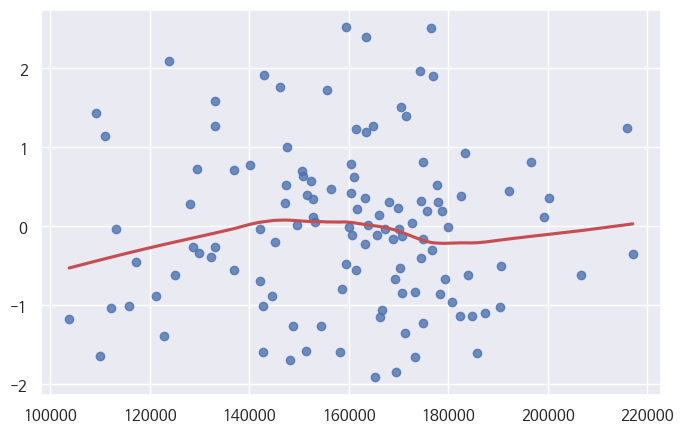

In [45]:
## 잔차 plot
plt.rc("figure", figsize=(8, 5))
sns.regplot(x = pred,
            y = res_standard,
            lowess = True,
            line_kws=dict(color="r"),
            data = regplot_df)

### 5.3 잔차의 정규성 검정

In [46]:
# shapiro test
pg.normality(result.resid)

,W,pval,normal
0,0.979869,0.069245,True


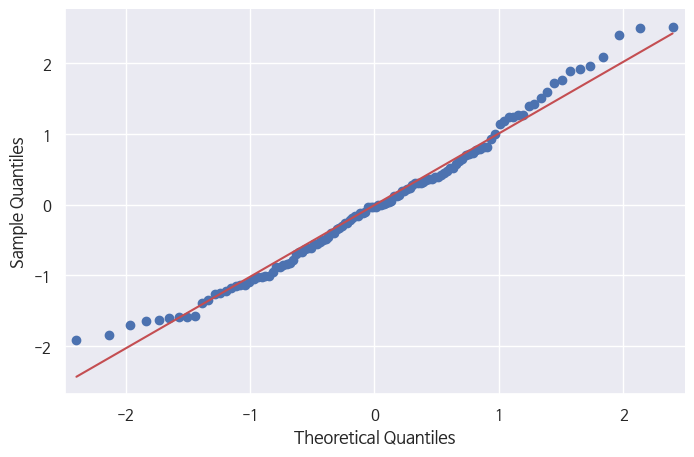

In [47]:
## QQ plot
plt.rc("figure", figsize=(8, 5))
sm.qqplot(res_standard, line = 's')
sns.despine()

### 5.4 이상치 제거

In [48]:
# 표준화 잔차를 이용한 이상치 확인
stud_res = result.outlier_test()
stud_res.sort_values(by = "student_resid", ascending = False).head(5)

,student_resid,unadj_p,bonf(p)
106,2.586316,0.011071,1.0
100,2.573774,0.011455,1.0
112,2.454216,0.015764,1.0
51,2.123546,0.036057,1.0
114,1.989706,0.049223,1.0


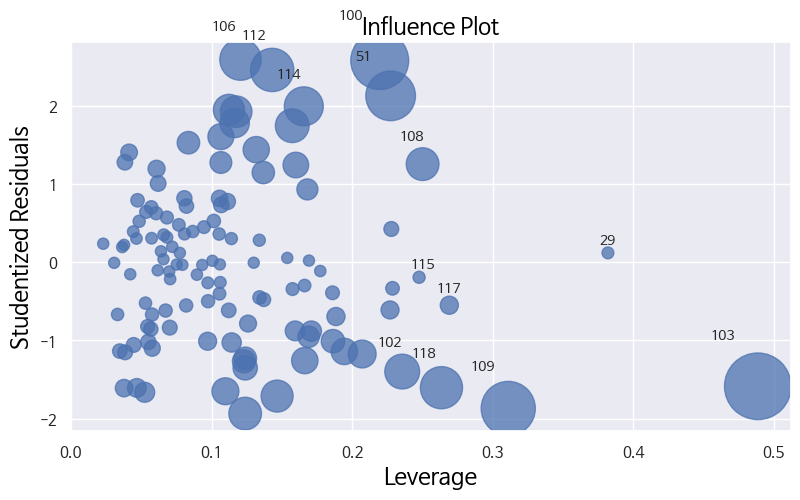

In [49]:
## cooks_distance를 이용한 이상치 확인
## https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html

fig = sm.graphics.influence_plot(result, criterion="cooks")
plt.rc("figure", figsize=(8, 5))
plt.rc("font", size = 7)
fig.tight_layout(pad = 1.0)

In [50]:
# cooks_distance를 이용한 이상치 확인
from statsmodels.stats.outliers_influence import OLSInfluence
test_class = OLSInfluence(result).cooks_distance
pd.DataFrame(test_class).T.sort_values(by = 0, ascending = False).head(10)

,0,1
103,0.169250,0.999699
100,0.126438,0.999948
109,0.110050,0.999978
51,0.091747,0.999993
112,0.068590,0.999999
118,0.064783,0.999999
106,0.062154,0.999999
114,0.054593,1.000000
102,0.042634,1.000000
76,0.039701,1.000000


In [25]:
# 이상치 제거
mr_df = mr_df.drop(120)

### 5.5 선형성

<Axes: xlabel='pred', ylabel='가격'>

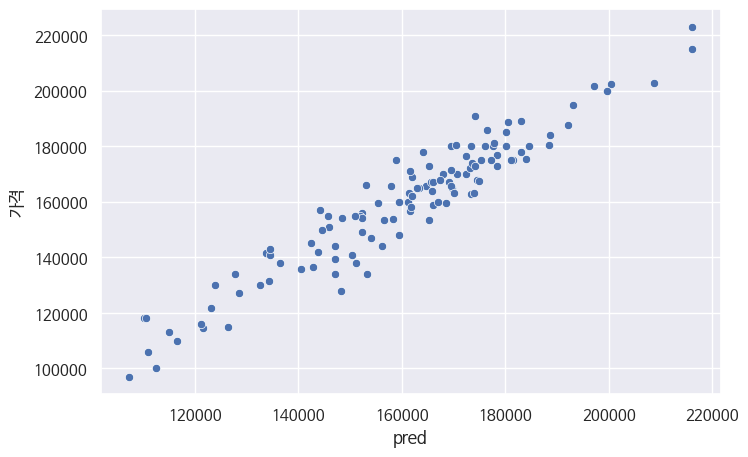

In [26]:
# 회귀도표: 예측치 vs 실제값
sns.scatterplot(x = regplot_df["pred"], y = mr_df["가격"])

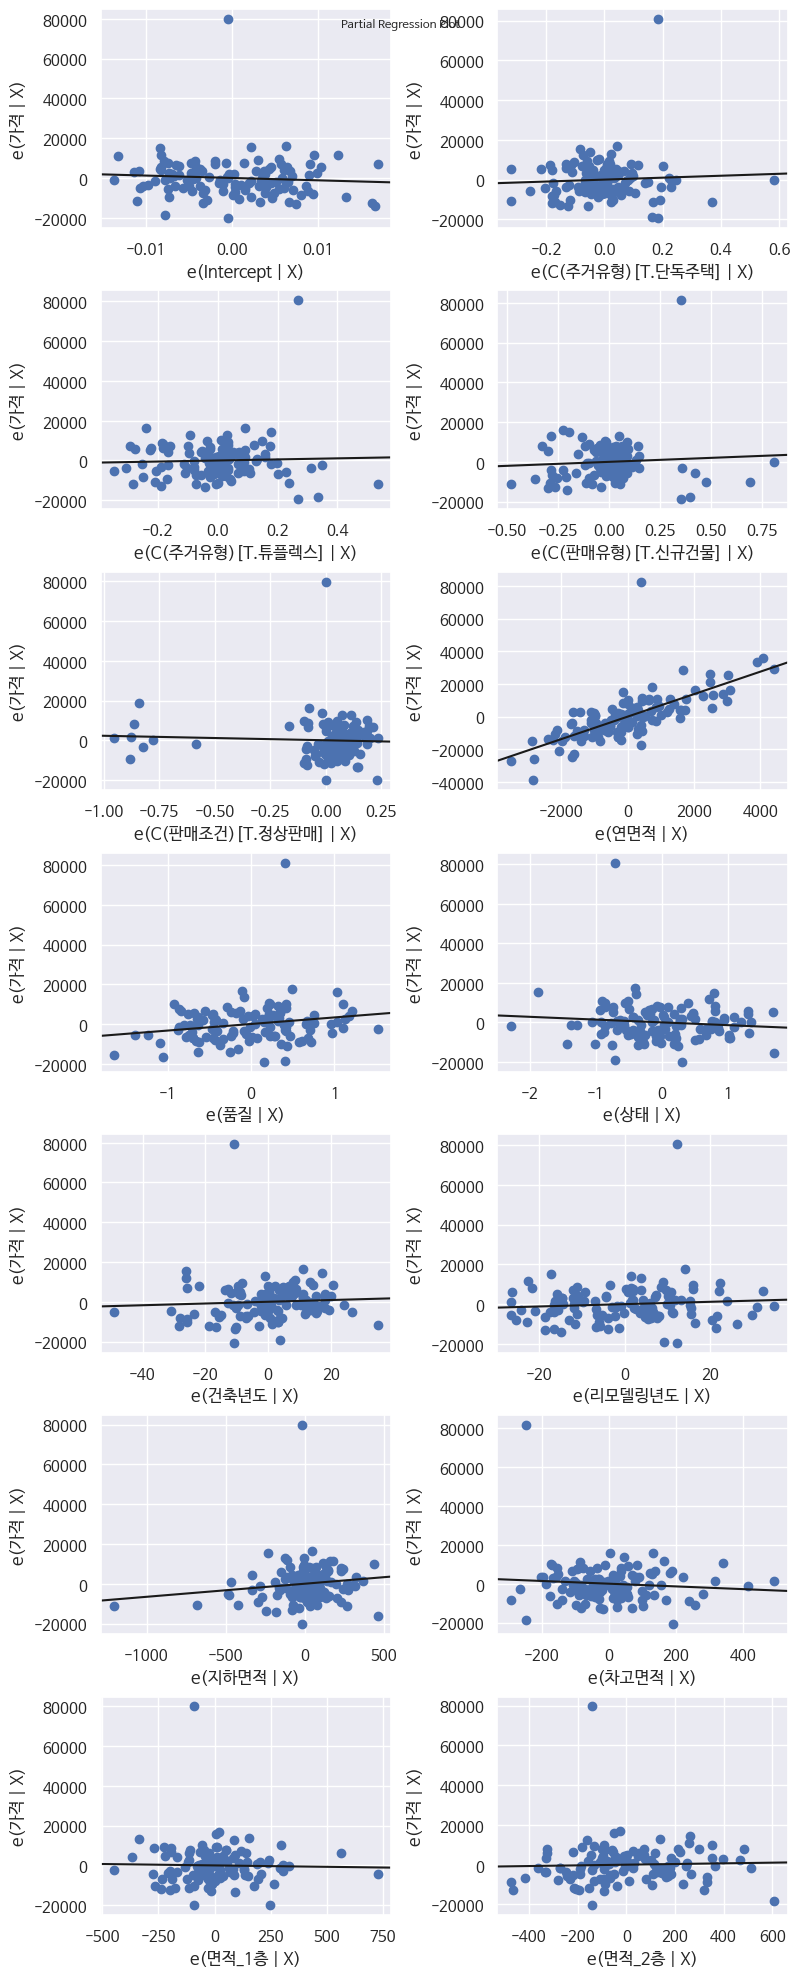

In [27]:
# 부분 회귀 도표
plt.rc("figure", figsize=(8, 20))
fig = sm.graphics.plot_partregress_grid(result)
fig.tight_layout(pad = 1.0)

### 5.6 다중 공선성
- VIF 10이상 삭제

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.values.shape[1])]
vif["features"] = X.columns
print(vif.round(1))

    VIF Factor         features
0      22312.0        Intercept
1         11.8  C(주거유형)[T.단독주택]
2          5.8  C(주거유형)[T.튜플렉스]
3          4.7  C(판매유형)[T.신규건물]
4          4.0  C(판매조건)[T.정상판매]
5          4.1              연면적
6          1.4               품질
7          2.2               상태
8          3.7             건축년도
9          1.7           리모델링년도
10         2.2             지하면적
11         1.4             차고면적
12         3.6            면적_1층
13         3.1            면적_2층


## 부록1 formula 사용
- https://www.statsmodels.org/devel/example_formulas.html
- 수치형 + 범주형
- smf.ols 이용
- 잔차검증시 문제점 있음

In [29]:
# 코드 이용
columns = ['연면적', '품질', '상태', '건축년도', '리모델링년도', '지하면적', '차고면적',
       '면적_1층', '면적_2층', 'C(주거유형)', 'C(판매유형)', 'C(판매조건)']

formula = "가격 ~ " + " + ".join(columns)
formula

'가격 ~ 연면적 + 품질 + 상태 + 건축년도 + 리모델링년도 + 지하면적 + 차고면적 + 면적_1층 + 면적_2층 + C(주거유형) + C(판매유형) + C(판매조건)'

In [30]:
import statsmodels.formula.api as smf

model = smf.ols(formula = formula, data = mr_df)
result = model.fit()

In [31]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     가격   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     113.2
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           7.19e-56
Time:                        12:23:23   Log-Likelihood:                -1217.3
No. Observations:                 120   AIC:                             2463.
Df Residuals:                     106   BIC:                             2502.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -1.1e+05    8.9e+04     

## 부록2 변수로 입력
- 수치형 변수만 입력
- pd.get_dummies(mr_df)를 이용할 수 있지만 복잡함

In [32]:
# 방법1 상수항 포함: sm.add_constant(X)

# X(대문자)와 y(소문자)로 분리
X = mr_df[['id', '가격', '연면적', '품질', '상태', '건축년도', '리모델링년도', '지하면적', '차고면적',
          '면적_1층', '면적_2층']]
y = mr_df['가격']
X = sm.add_constant(X) # 상수항 추가
model = sm.OLS(y, X)   # 모델 생성
result = model.fit()   # 모델 실행

In [33]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     가격   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.178e+29
Date:                Sat, 02 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:23:23   Log-Likelihood:                 2500.0
No. Observations:                 120   AIC:                            -4976.
Df Residuals:                     108   BIC:                            -4942.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.557e-09   2.73e-09      0.571      0.5

## 부록3 pingouin
- https://pingouin-stats.org/build/html/generated/pingouin.linear_regression.html#pingouin.linear_regression
- 분석이 간단하지만 가정검정 지원이 안됨

In [34]:
# dmatrix 이용
from patsy import dmatrices

y, X = dmatrices(formula,
                 data = mr_df,
                 return_type = 'dataframe')

In [35]:
y = mr_df['가격']
y

0      150750
1      131500
2      160000
3      187500
4      153900
        ...  
115    144000
116     97000
117    133900
118    133900
119    128000
Name: 가격, Length: 120, dtype: int64

In [36]:
lm = pg.linear_regression(X, y)
lm.round(3)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-110012.777,88964.779,-1.237,0.219,0.933,0.925,-286394.104,66368.550
1,C(주거유형)[T.단독주택],-4363.925,4744.105,-0.920,0.360,0.933,0.925,-13769.575,5041.726
2,C(주거유형)[T.튜플렉스],-7781.012,4212.797,-1.847,0.068,0.933,0.925,-16133.292,571.267
3,C(판매유형)[T.신규건물],-4911.879,3404.865,-1.443,0.152,0.933,0.925,-11662.355,1838.597
4,C(판매조건)[T.정상판매],-2261.452,2550.914,-0.887,0.377,0.933,0.925,-7318.888,2795.984
5,연면적,6.738,0.400,16.824,0.000,0.933,0.925,5.944,7.531
6,품질,2400.146,975.884,2.459,0.016,0.933,0.925,465.361,4334.930
7,상태,-334.059,817.579,-0.409,0.684,0.933,0.925,-1954.990,1286.872
8,건축년도,90.800,43.582,2.083,0.040,0.933,0.925,4.393,177.206
9,리모델링년도,7.451,43.030,0.173,0.863,0.933,0.925,-77.859,92.762


In [37]:
pg.normality(lm.residuals_)

,W,pval,normal
0,0.979869,0.069245,True
